In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from path import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_blobs


In [2]:
data = Path('/Users/Sheem/OneDrive/Desktop/Analysis Projects/Final Project/test_table_2.csv')
df = pd.read_csv(data)
                 
df = df.dropna()

df.head(10)

,title,platform,release-date,score,user_score,developer,genre,critics,users,franchise,global_sales
3,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",18,64,007: Quantum of Solace,0.03
4,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",42,59,007: Quantum of Solace,1.14
16,1701 A.D.,PC,6-Nov-06,79,7.8,RelatedDesigns,"Strategy,Real-Time,Historic,General,Historic",30,45,1701 A.D.,0.30
25,2010 FIFA World Cup South Africa,PlayStation3,27-Apr-10,82,7.8,EACanada,"Sports,Traditional,Team,Soccer,Sim,Sim",56,65,FIFA,1.23
26,2014 FIFA World Cup Brazil,PlayStation3,15-Apr-14,73,4.5,EACanada,"Sports,Traditional,Team,Soccer,Sim",33,93,FIFA,0.61
35,3D Dot Game Heroes,PlayStation3,11-May-10,77,8.1,SiliconStudio,"Role-Playing,Action RPG,Action RPG",66,103,3D Dot Game Heroes,0.57
39,50 Cent: Blood on the Sand,PlayStation3,24-Feb-09,72,6.8,SwordfishStudios,"Action,Shooter,Shooter,Third-Person,Modern,Mod...",37,68,50 Cent: Blood on the Sand,0.19
94,Ace Combat: Assault Horizon,PlayStation3,11-Oct-11,77,6.9,ProjectAces,"Action,Simulation,Flight,Flight,Combat",28,97,Ace Combat,0.74
120,Agatha Christie: The ABC Murders,PC,4-Feb-16,66,8.5,Kalypso,"Adventure,General,Point-and-Click",0,16,Agatha Christie,0.02
121,Agatha Christie's The ABC Murders,XboxOne,23-Feb-16,66,6.6,Microids,"Adventure,3D,Third-Person",7,10,Agatha Christie,0.01


In [3]:
# Create our features
X = pd.get_dummies(df.drop('global_sales', axis=1))

# Create our target
y = df["global_sales"]

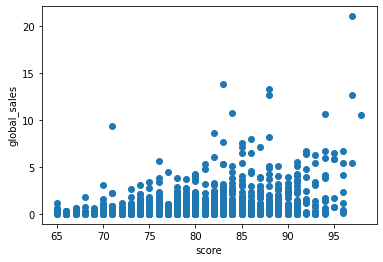

In [4]:
#17.2.3
plt.scatter(df.score, df.global_sales)
plt.xlabel('score')
plt.ylabel('global_sales')
plt.show()

In [5]:
y.value_counts()

0.02    68
0.03    55
0.04    44
0.05    37
0.01    33
        ..
3.62     1
5.07     1
8.16     1
1.11     1
1.32     1
Name: global_sales, Length: 301, dtype: int64

In [6]:
X = df.score.values.reshape(-1, 1)

In [7]:
X[:5]

array([[70],
       [65],
       [79],
       [82],
       [73]], dtype=int64)

In [8]:
X.shape

(1132, 1)

In [9]:
y = df.global_sales

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression()

In [12]:
y_pred = model.predict(X)
print(y_pred.shape)

(1132,)


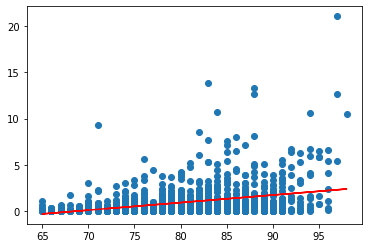

In [13]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
#17.2.3
print(model.coef_)
print(model.intercept_)

[0.08138985]
-5.559850594553499


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(849, 1)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [17]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='auto', n_jobs=None, penalty='l2',
                       random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                       warm_start=False)


LogisticRegression()

In [18]:
model.fit(X, y)

LinearRegression()

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

In [ ]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
# Making predictions using the testing data.
predictions = pd.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances